In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
print(train.head())

   id   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0  35.0       175.0        75.0       83.0             0.8   
1   1  40.0       150.0        50.0       67.0             1.2   
2   2  40.0       170.0        65.0       75.0             1.0   
3   3  30.0       170.0        75.0       83.0             1.5   
4   4  45.0       175.0        85.0       99.0             0.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...   HDL    LDL  \
0              0.8            1.0             1.0     113.0  ...  47.0  114.0   
1              1.2            1.0             1.0     118.0  ...  66.0  130.0   
2              1.5            1.0             1.0     122.0  ...  58.0  100.0   
3              1.2            1.0             1.0     118.0  ...  75.0  111.0   
4              1.0            1.0             1.0     129.0  ...  52.0  101.0   

   hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
0        15.5            1.0               1.1  

In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

In [7]:
print(train.describe())

                 id          age    height(cm)    weight(kg)    waist(cm)  \
count  15000.000000  15000.00000  15000.000000  15000.000000  15000.00000   
mean    7499.500000     42.70100    164.658333     64.246733     80.26292   
std     4330.271354     10.60395      8.624957     10.988147      7.89872   
min        0.000000     20.00000    135.000000     40.000000     57.00000   
25%     3749.750000     40.00000    160.000000     55.000000     75.00000   
50%     7499.500000     40.00000    165.000000     65.000000     80.00000   
75%    11249.250000     50.00000    170.000000     70.000000     86.00000   
max    14999.000000     80.00000    190.000000    130.000000    121.00000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count    15000.000000     15000.000000   15000.000000    15000.000000   
mean         1.035840         1.024733       1.005600        1.004933   
std          0.321701         0.285352       0.074626        0.070067   
min          0

In [15]:
null_check=pd.isnull(train).sum()

In [16]:
null_check

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

smoking
0.0    9438
1.0    5562
Name: count, dtype: int64


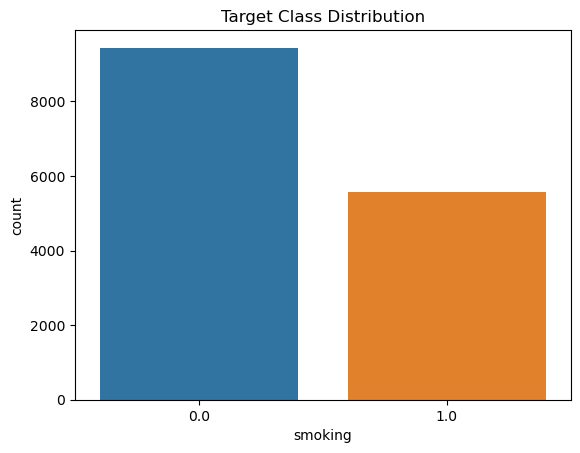

In [40]:
print(train['smoking'].value_counts())
sns.countplot(data=train, x='smoking')
plt.title("Target Class Distribution")
plt.show()

In [19]:
X = train.drop(columns=['id', 'smoking'])
y = train['smoking']
X_test = test.drop(columns=['id'])

In [20]:
X_test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40.0,165.0,55.0,70.0,1.5,1.2,1.0,1.0,113.0,63.0,...,75.0,72.0,91.0,13.0,1.0,0.6,19.0,11.0,10.0,1.0
1,45.0,155.0,60.0,92.5,1.0,1.0,1.0,1.0,124.0,80.0,...,93.0,51.0,108.0,13.8,1.0,0.8,16.0,17.0,17.0,0.0
2,50.0,175.0,65.0,81.0,1.2,1.2,1.0,1.0,120.0,70.0,...,79.0,46.0,118.0,14.7,1.0,0.8,19.0,16.0,19.0,0.0
3,40.0,160.0,60.0,76.0,1.0,1.0,1.0,1.0,115.0,76.0,...,107.0,46.0,138.0,12.5,1.0,0.6,20.0,14.0,13.0,0.0
4,20.0,170.0,65.0,74.0,1.0,1.2,1.0,1.0,129.0,82.0,...,53.0,51.0,121.0,14.7,1.0,0.9,20.0,13.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50.0,160.0,55.0,68.0,0.7,0.5,1.0,1.0,134.0,74.0,...,102.0,50.0,110.0,12.5,1.0,0.7,21.0,17.0,14.0,1.0
9996,40.0,175.0,65.0,78.0,1.2,1.2,1.0,1.0,124.0,77.0,...,79.0,60.0,127.0,15.1,1.0,0.9,21.0,17.0,31.0,0.0
9997,50.0,155.0,50.0,73.0,1.0,1.2,1.0,1.0,109.0,60.0,...,75.0,83.0,124.0,13.0,2.0,0.6,20.0,13.0,11.0,0.0
9998,40.0,160.0,50.0,70.0,1.5,1.5,1.0,1.0,96.0,61.0,...,98.0,64.0,127.0,14.0,1.0,0.9,25.0,16.0,27.0,0.0


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

Model Training & Evaluation

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_val)[:,1]

In [26]:
print("AUC-ROC:", roc_auc_score(y_val, y_pred_proba))

AUC-ROC: 0.8819289513918331


In [32]:
import lightgbm as lgb

In [33]:
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.03)
lgb_model.fit(X_train, y_train)
y_pred_proba = lgb_model.predict_proba(X_val)[:,1]

[LightGBM] [Info] Number of positive: 4468, number of negative: 7532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372333 -> initscore=-0.522220
[LightGBM] [Info] Start training from score -0.522220


In [34]:
print("AUC-ROC:", roc_auc_score(y_val, y_pred_proba))

AUC-ROC: 0.8865700731453259


In [35]:
test_probs = lgb_model.predict_proba(X_test_scaled)[:,1]

In [36]:
test_probs

array([0.01865444, 0.03457157, 0.5308156 , ..., 0.00239783, 0.13586246,
       0.76924224])

In [42]:
y_val_pred = model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC-ROC Score: {auc_score:.4f}")

Validation AUC-ROC Score: 0.8819


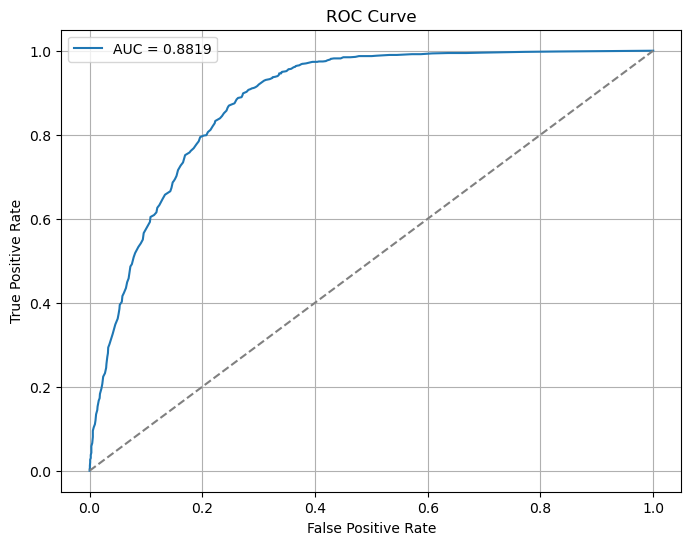

In [43]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
importances = lgb_model.feature_importances_
feat_names = X.columns

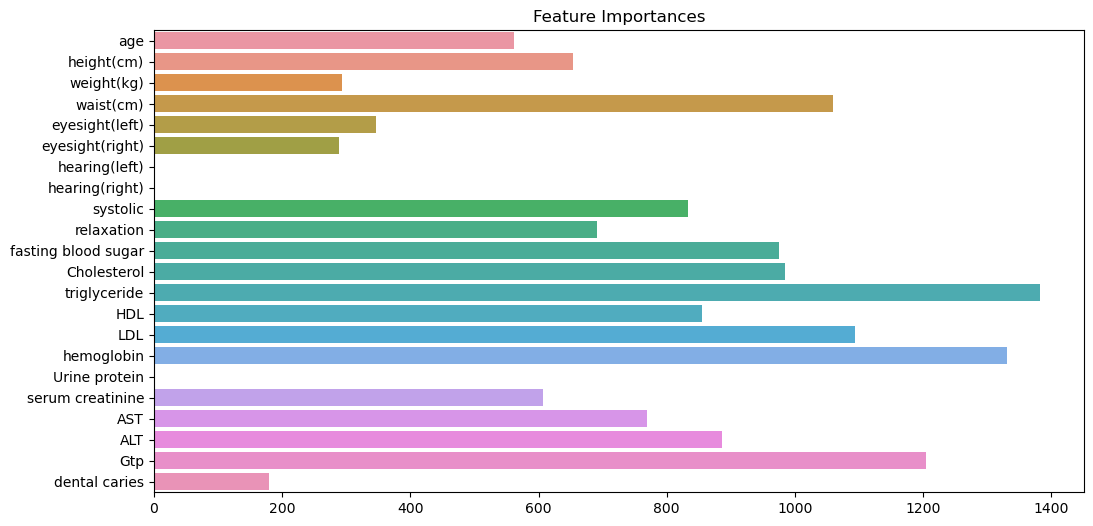

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()

In [45]:
import joblib
joblib.dump(model, 'smoking_model.pkl')

['smoking_model.pkl']

In [47]:
import numpy as np
np.save("train_scaler_data.npy", X)